

---


**MACHINE LEARNING- CLASSIFICATIONS**

**SUBMISSION BY - ALAISSA SHAIKH**

---



In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
data = pd.read_csv('/content/ML_PCOS.csv')

In [ ]:
#displaying the dataset info and first few rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
print(data.head())

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [ ]:
#checking for missing values
print(data.isna().sum())

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
#inspecting non-numeric values in these columns
for column in non_numeric_columns:
    print(f"Unique values in '{column}':", data[column].unique())

Unique values in 'II    beta-HCG(mIU/mL)': ['1.99' '494.08' '801.45' '100.51' '158.51' '1214.23' '91.55' '749.98'
 '218.65' '13' '610.63' '4490.18' '11.24' '15' '768.03' '12' '10' '20'
 '30.66' '1455' '497.41' '167' '9.83' '141.06' '528.5' '177.57' '65.03'
 '173.66' '161.49' '3.98' '756.61' '255.02' '273.7' '14.46' '145.89'
 '100.09' '110.17' '174.37' '75.51' '3893.06' '600.23' '3350.19' '97.63'
 '14.4' '2' '177.58' '12.17' '25.3' '100.2' '479.66' '1.9' '586.06'
 '1.99.' '2.8' '15.36' '54.08' '152.13' '3.05' '201.36' '16069.69' '57.08'
 '232.71' '23.5' '180.3' '102.3' '481.3' '563.8' '4.32' '230.5' '155.3'
 '3.888' '523.6' '1.65' '3.83' '569.1' '236.5' '896.6' '2.58' '569.3'
 '108.66' '3.99' '121.8' '122.58' '355.28' '122.3' '596.2' '588.7' '147.6'
 '12.37' '144.63' '475.04' '515.53' '99.69' '70.42' '342.91' '148.52'
 '272.78' '355.51' '150.91' '391.46' '464.12' '41.77' '1390.58' '213.83'
 '45.9' '18.36' '154.48' '25000' '638.52' '4.76' '18.13' '89.34' '366.04'
 '14.34' '75.62' '4.96' 

In [ ]:
#replacing problematic non-numeric values
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')

In [ ]:
#handling missing values after conversion
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].mean(), inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].mean(), inplace=True)

In [ ]:
#reconfirming that all values are now numeric
print("Data types after cleaning:")
print(data.dtypes)

Data types after cleaning:
Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)           

In [ ]:
#defining the target and features
y = data['PCOS (Y/N)']
X = data.drop(['PCOS (Y/N)', 'Patient File No.', 'Unnamed: 44'], axis=1)

In [ ]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---


### **RANDOM FOREST CLASSIFIER**


---



*   Ensemble learning method based on decision trees.

*   Random Forest builds multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of individual trees.


---


**How it works?**
1.   Each tree in the forest is trained on a different subset of the training data.

1.   During prediction, each tree independently classifies the input, and the class with the most votes (mode) is selected as the final prediction.


In [ ]:
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])



---


### **DECISION TREE**


---



*   Decision trees recursively split the input space into regions based on feature values to make decisions.


---


**How it works?**
1.   The tree is built recursively by selecting the best feature to split the data at each node based on a criterion .

1.   The process continues until a stopping criterion is met.

In [ ]:
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier(random_state=42))
])



---


### **SUPPORT VECTOR MACHINES**


---



*   SVMs aim to find the hyperplane that best separates the classes in the input space.
*   They can handle both linear and non-linear decision boundaries using different kernel functions.


---


**How it works?**
1.   SVMs find the hyperplane with the maximum margin that separates the classes.

1.   For non-linear problems, SVMs map the input space into a higher-dimensional space using kernel functions to find a linearly separable hyperplane.

In [ ]:
pipeline_svm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC(random_state=42))
])


---


### **K Nearest Neighbour**


---



*   Makes predictions based on the majority class or mean value of the k-nearest neighbors in the feature space.
*   It does not explicitly learn a model during training but stores all training instances to make predictions.


---


**How it works?**
1.   Identifies the k nearest neighbors in the training data based on a distance metric.

1.   The class or value of the new instance is determined by the majority class or mean value of its k-nearest neighbors.

In [ ]:
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', KNeighborsClassifier())
])



---


### **NAIVE BAYES CLASSIFIER**


---



*   Models the probability of each class given the input features using Bayes' theorem and assumes that all features are conditionally independent given the class.


---


**How it works?**
1.   Calculates the posterior probability of each class given the input features using Bayes' theorem.

1.   The class with the highest posterior probability is selected as the predicted class for the input.

In [ ]:
pipeline_nb = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

**FITTING THE PIPELINES**

In [ ]:
# Fit the pipelines on training data and make predictions
pipelines = {
    'Random Forest': pipeline_rf,
    'Decision Tree': pipeline_dt,
    'SVM': pipeline_svm,
    'kNN': pipeline_knn,
    'Naive Bayes': pipeline_nb
}

**PRINTING ACCURACIES**

In [ ]:
accuracies = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[name] = accuracy
    print(f"{name} Accuracy:", accuracy)
    print(classification_report(y_test, predictions))

Random Forest Accuracy: 0.8715596330275229
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        77
           1       0.80      0.75      0.77        32

    accuracy                           0.87       109
   macro avg       0.85      0.84      0.84       109
weighted avg       0.87      0.87      0.87       109

Decision Tree Accuracy: 0.8899082568807339
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        77
           1       0.76      0.91      0.83        32

    accuracy                           0.89       109
   macro avg       0.86      0.89      0.87       109
weighted avg       0.90      0.89      0.89       109

SVM Accuracy: 0.7155963302752294
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        77
           1       1.00      0.03      0.06        32

    accuracy                           0.72       109
   macro 

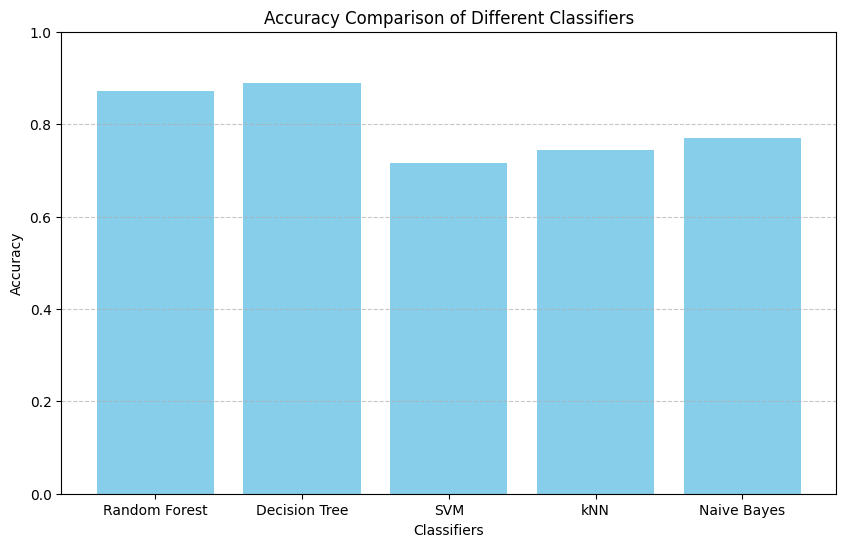

In [ ]:
# Plot the accuracies
classifiers_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_values, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()